In [51]:
import pandas as pd
pd.options.display.max_rows = 10
pd.options.display.max_columns = 6
data = pd.read_csv("https://www.dropbox.com/s/lp6v5iz1c1jlh8f/PTTI_results.csv?dl=1", sep=",")
data

Scenario      Date  Health effects(cases)- Total  ...  \
0         IL  2020 Mar                  1.912833e+06  ...   
1         IL  2020 Apr                  4.309022e+06  ...   
2         IL  2020 May                  4.605822e+06  ...   
3         IL  2020 Jun                  4.813280e+06  ...   
4         IL  2020 Jul                  5.479492e+06  ...   
..       ...       ...                           ...  ...   
120   PTTI-3  2021 Nov                  4.683931e+06  ...   
121   PTTI-3  2021 Dec                  4.683931e+06  ...   
122   PTTI-3  2022 Jan                  4.683931e+06  ...   
123   PTTI-3  2022 Feb                  4.683931e+06  ...   
124   PTTI-3  2022 Mar                  4.683931e+06  ...   

     Productivity costs (£M) - Non-hospital cases  \
0                                      666.492303   
1                                     1501.401163   
2                                     1604.815927   
3                                     1677.100837   
4                                     1909.230220   
..                                            ...   
120                                   1632.031525   
121                                   1632.031525   
122                                   1632.031525   
123                                   1632.031525   
124                                   1632.031525   

     Productivity costs (£M) - Lockdown  Public Health costs (£M) - Total  
0                                1712.8                               0.0  
1                                6552.8                               0.0  
2                               11392.8                               0.0  
3                               13105.6                               0.0  
4                               17945.6                               0.0  
..                                  ...                               ...  
120                             46212.0                           22428.1  
121                             48072.0                           23771.1  
122                             49932.0                           25114.1  
123                             51792.0                           26457.1  
124                             53652.0                           27800.1  

[125 rows x 18 columns]

In [52]:
data.shape[1]

18

/Users/Shared/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


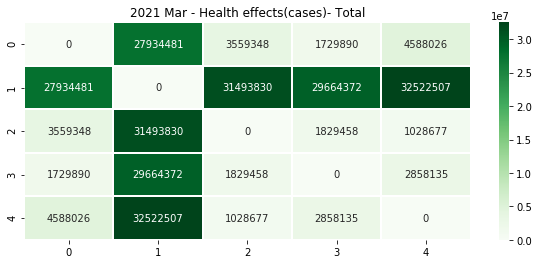

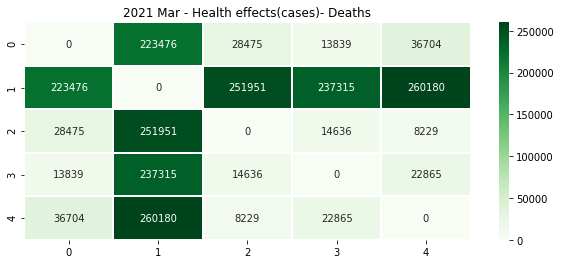

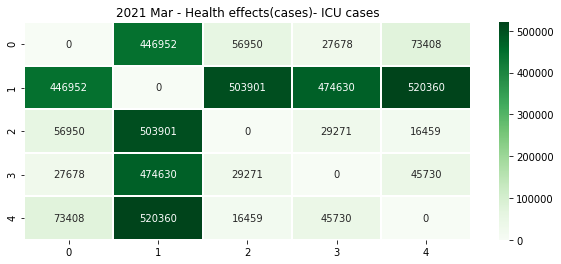

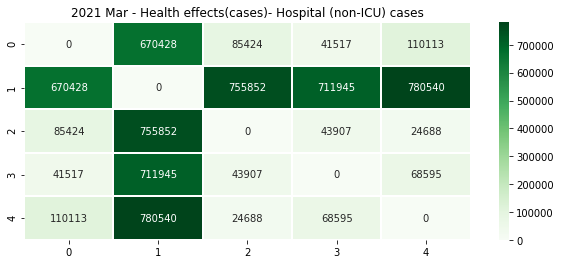

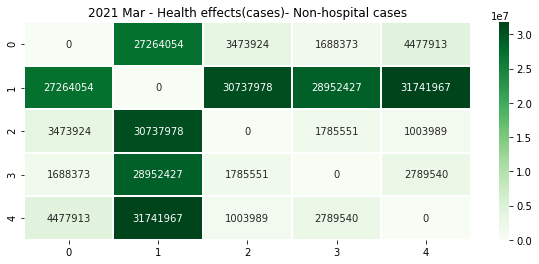

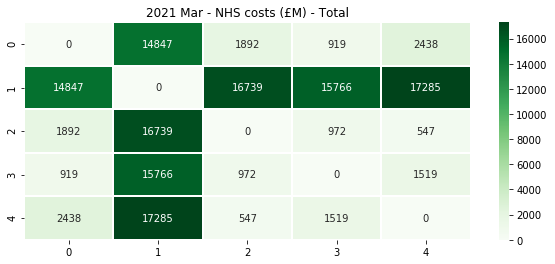

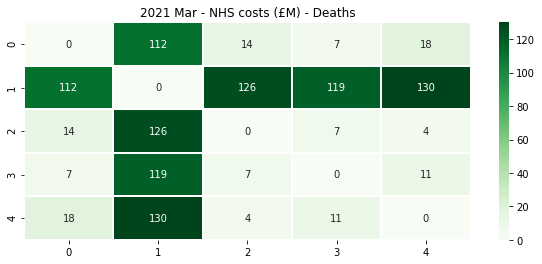

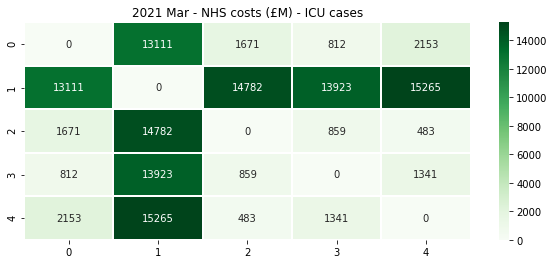

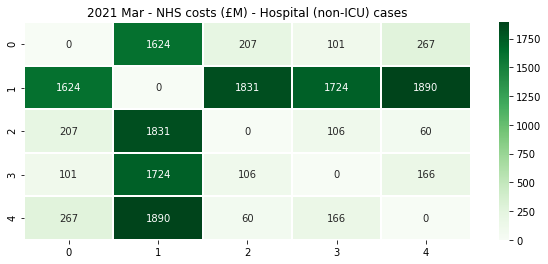

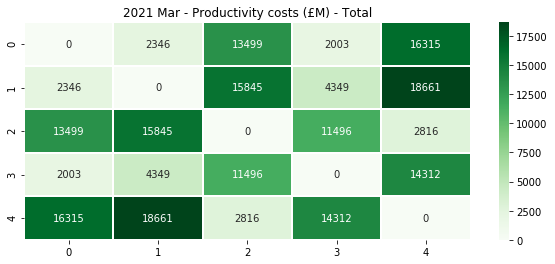

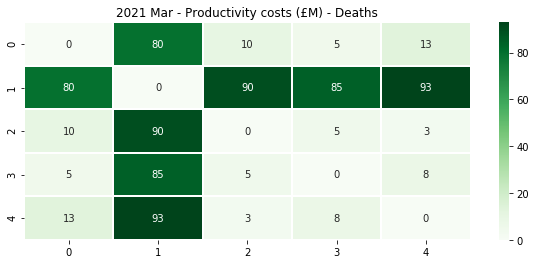

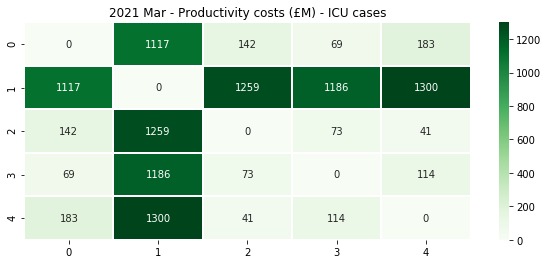

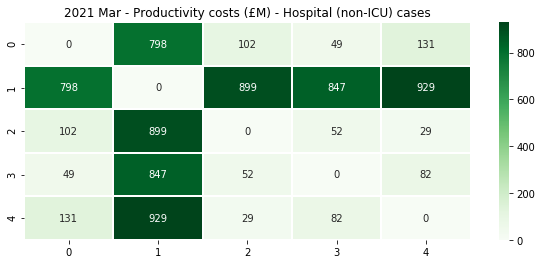

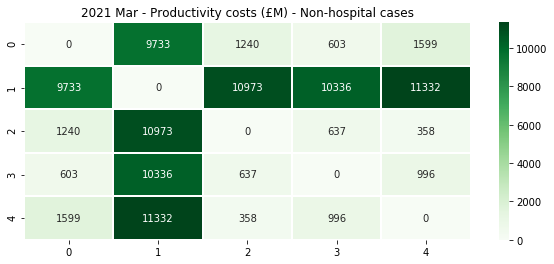

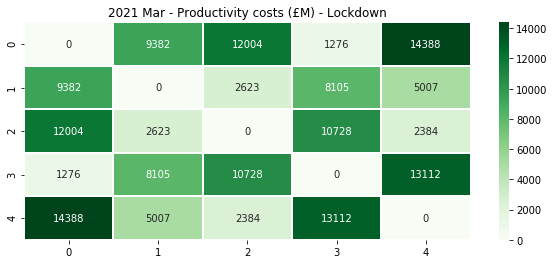

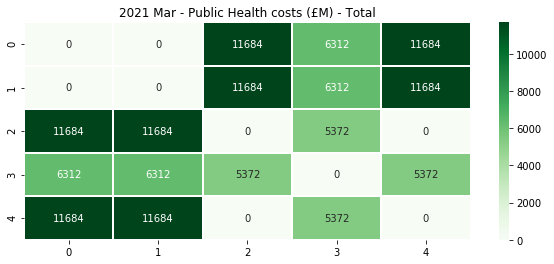

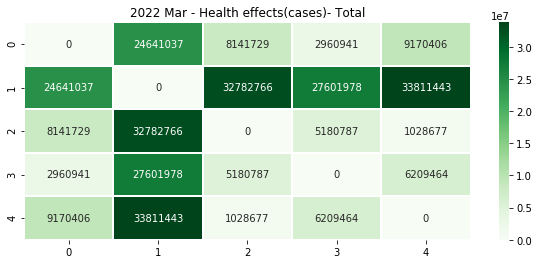

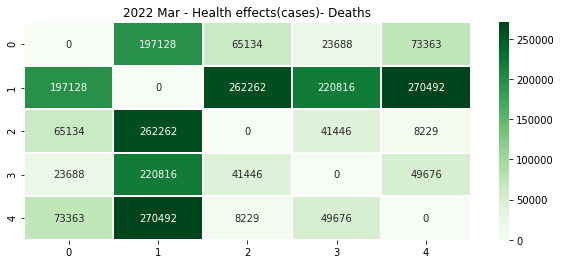

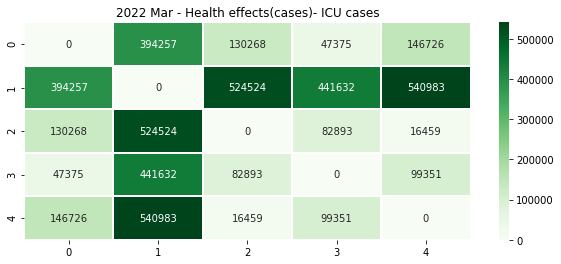

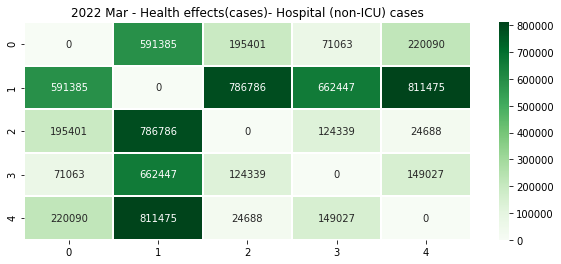

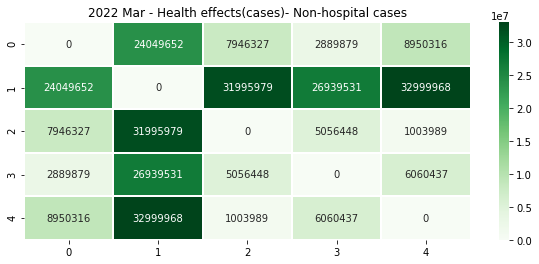

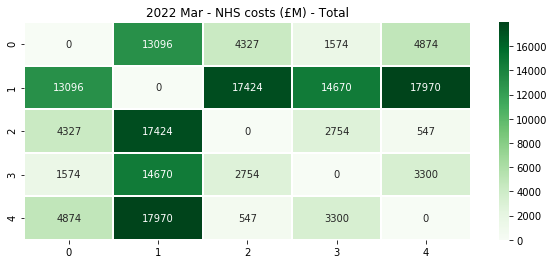

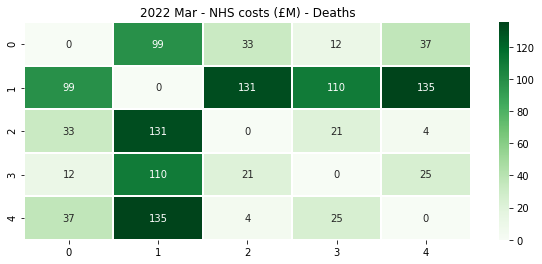

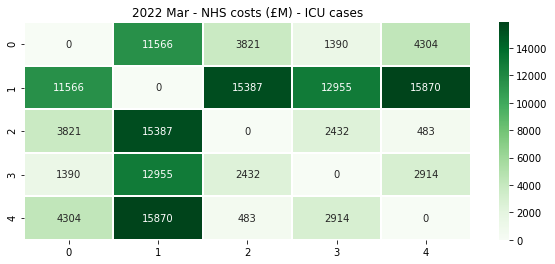

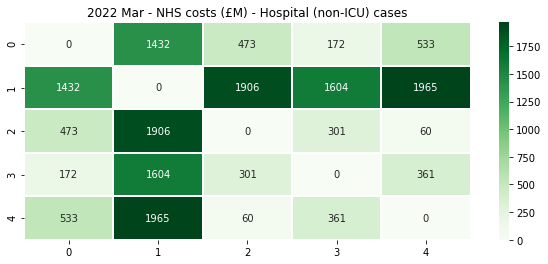

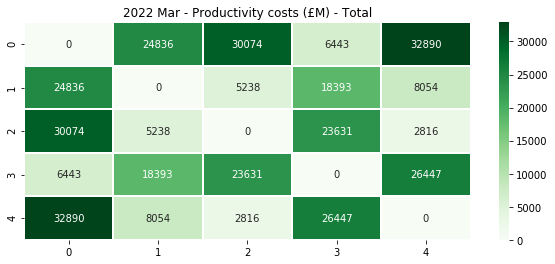

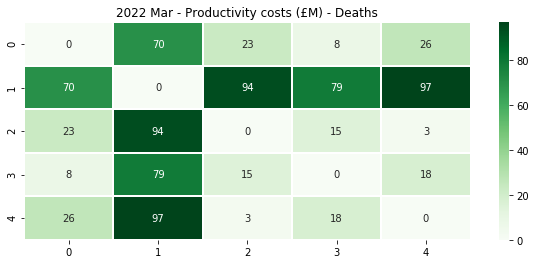

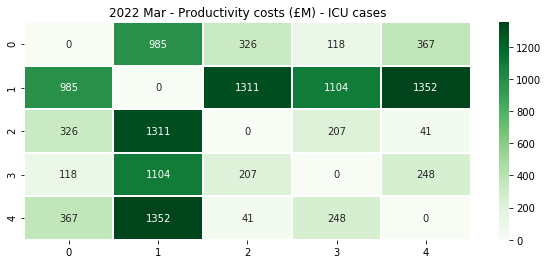

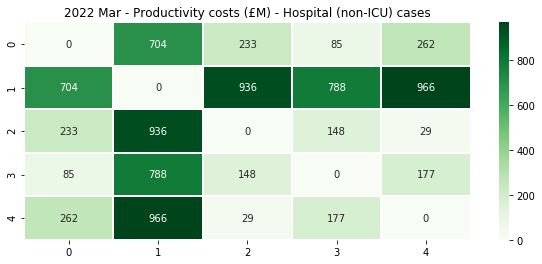

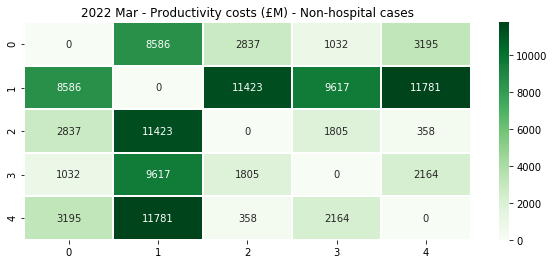

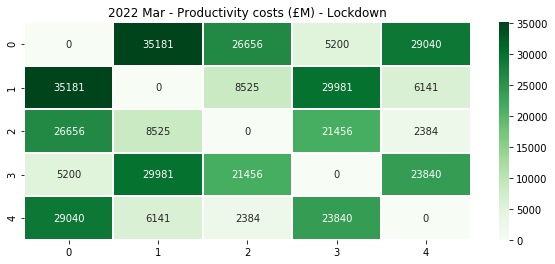

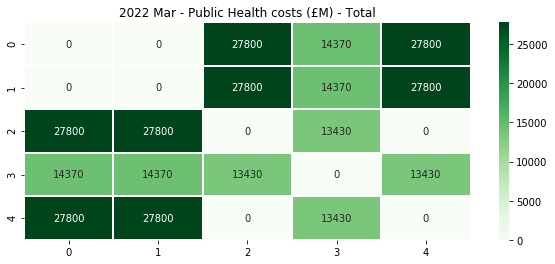

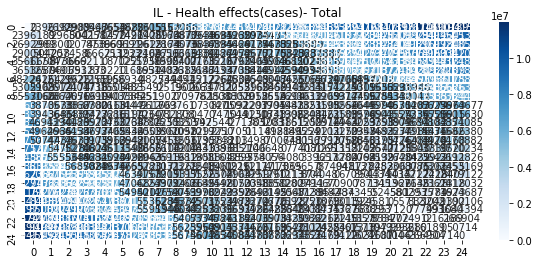

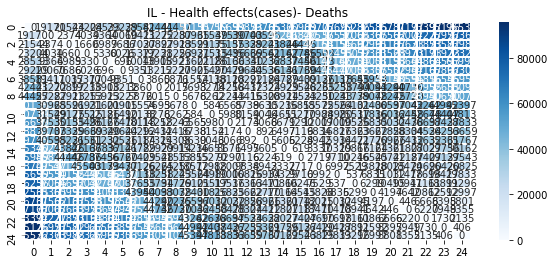

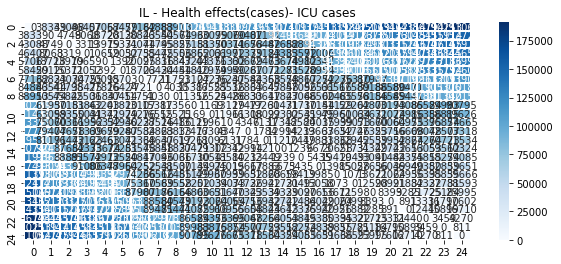

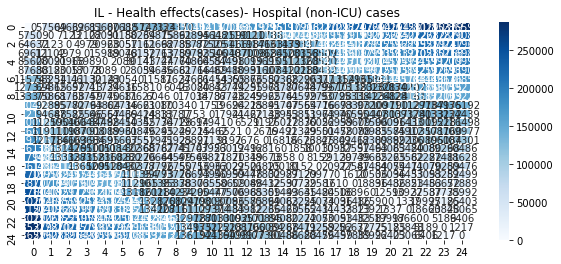

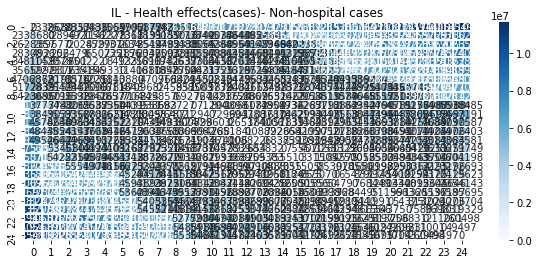

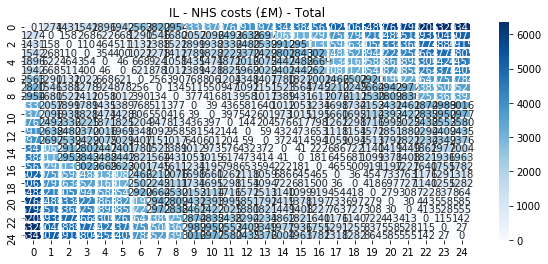

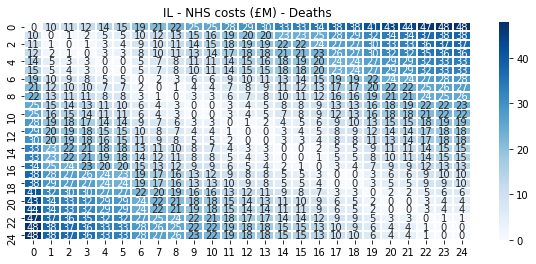

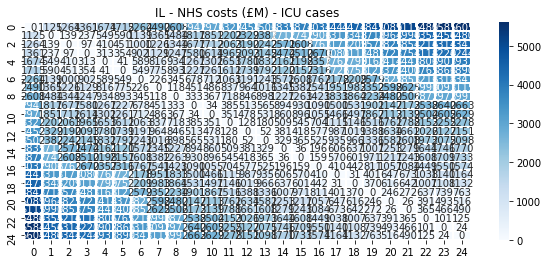

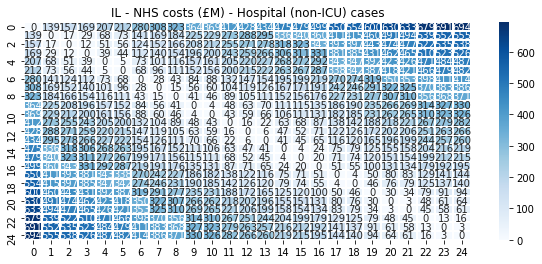

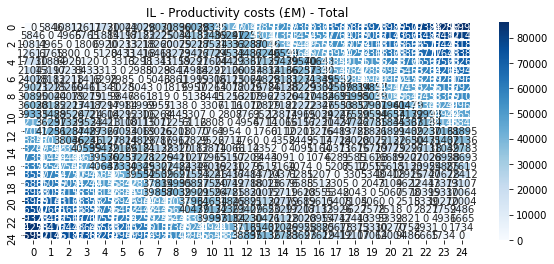

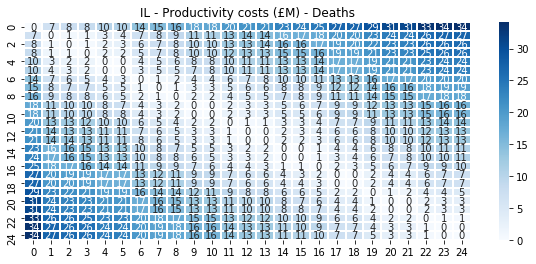

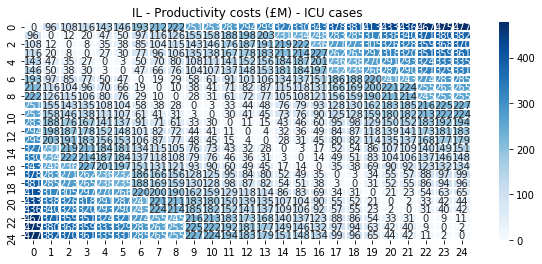

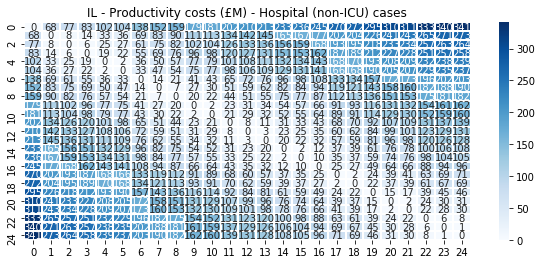

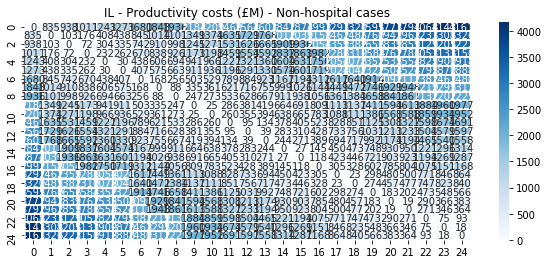

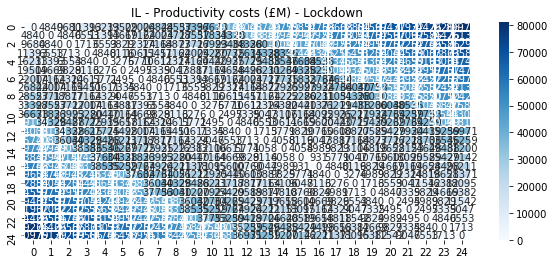

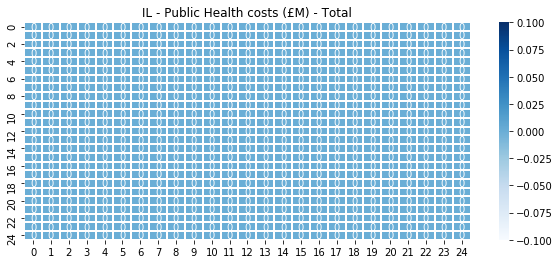

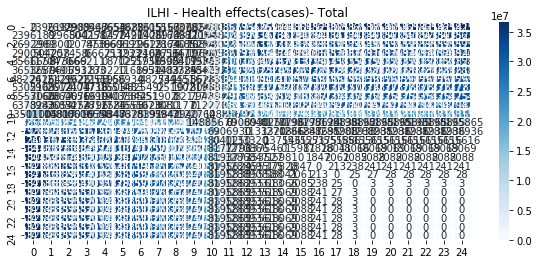

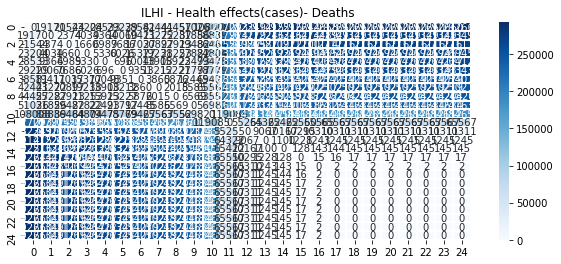

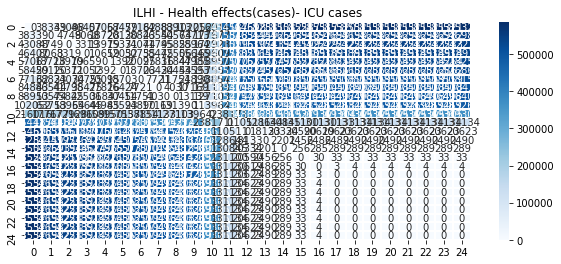

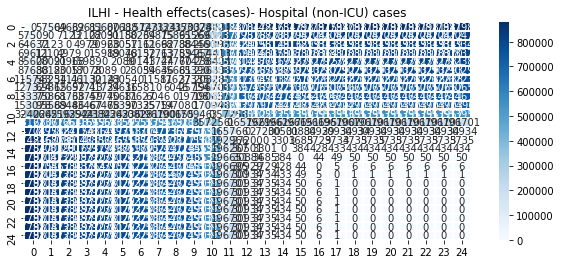

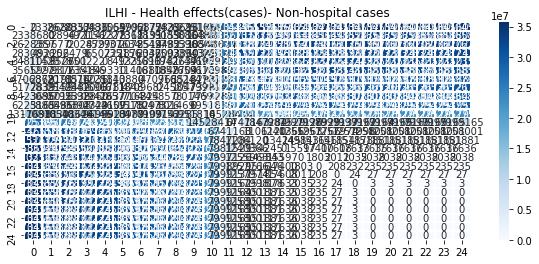

In [ ]:
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
import seaborn as sns
import matplotlib.pyplot as plt

dates = ['2021 Mar','2022 Mar'];
#dates = data.Date.unique().tolist()
scenarios = data.Scenario.unique().tolist()
variables = (dates, scenarios)
labels = (scenarios, dates)

for z in range (0,len(variables)):    
    
    variable = variables[z]
    
    for y in range (0,len(variable)):
#    for y in range (0,2):
        
        for x in range (0,data.shape[1]-2):
#        for x in range (0,2):
        
            summary4 = data.loc[data[('Date','Scenario')[z]] == variable[y]].groupby([('Date','Scenario')[z],('Scenario','Date')[z]]).fillna(0).iloc[:,[x]]

            pairwise = pd.DataFrame(
                squareform(pdist(summary4)),
                #columns = labels[z],
                #index = labels[z]
                )

            # plot it with seaborn
            plt.figure(figsize=(10,4))
            sns.heatmap(
                pairwise,
                #cmap=('YlGnBu','BuPu')[y],
                cmap=('Greens','Blues','YlGnBu','BuPu','Reds')[z],
                linewidth=1,
                annot=True,
                #center=500,
                #vmin=100, vmax=1000,
                fmt=".0f",
            );
    
            plt.title(variable[y]+' - '+list(data.columns.values)[x+2])
            #plt.title(variable[y])